<a href="https://colab.research.google.com/github/harshithach999/Advance-AI/blob/main/birds_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '100-bird-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F534640%2F5468571%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240413%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240413T190344Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd01f48b8140862cd62d1e6976a6cfc6665dfcf1ac834b8fc27b0a4bdd0f3ba839157c436e8dd7287a02dce28bf01bd7e2ecd2277d6af14556e6ee25c103e1a1aa973f273d01a8a1a5cf71e0529037e84d804ce512f66d9c522abe9cf350475af3ead226a8e774af7a598a346f711f0c94865dd4ce6c3c1d13c1443701edd996a69fe39ef99da1ed224f2eb76df547bee8bf676466bf544cf0eb8db469daa0d4f9011e0ea67733225b3839c2453dddb66e74c8caa6467042519a843a355ec82ed6265ecbf25310978d3a9825213903c4cad5484ef1f55ab4ac5c6b42e592be50b2a2749f8d8ccfec01331218450141af0b9e17e47a2d8acd724a38387a7c38e96'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2099628449 bytes downloaded
Downloaded and uncompressed: 100-bird-species
Data source import complete.


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 "/kaggle/input/100-bird-species/train",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/test",
    image_size=(224, 224),
    batch_size=32)
validata = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/valid",
    image_size=(224, 224),
    batch_size=32)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [ ]:
import numpy as np
class_names = train_dataset.class_names
np.shape(class_names)

(525,)

In [ ]:
class_names[:10]

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS']

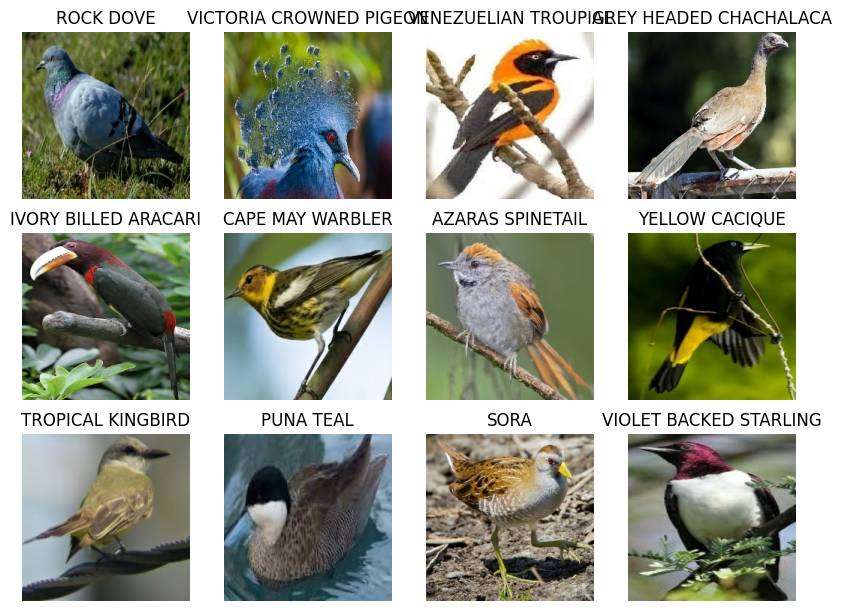

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

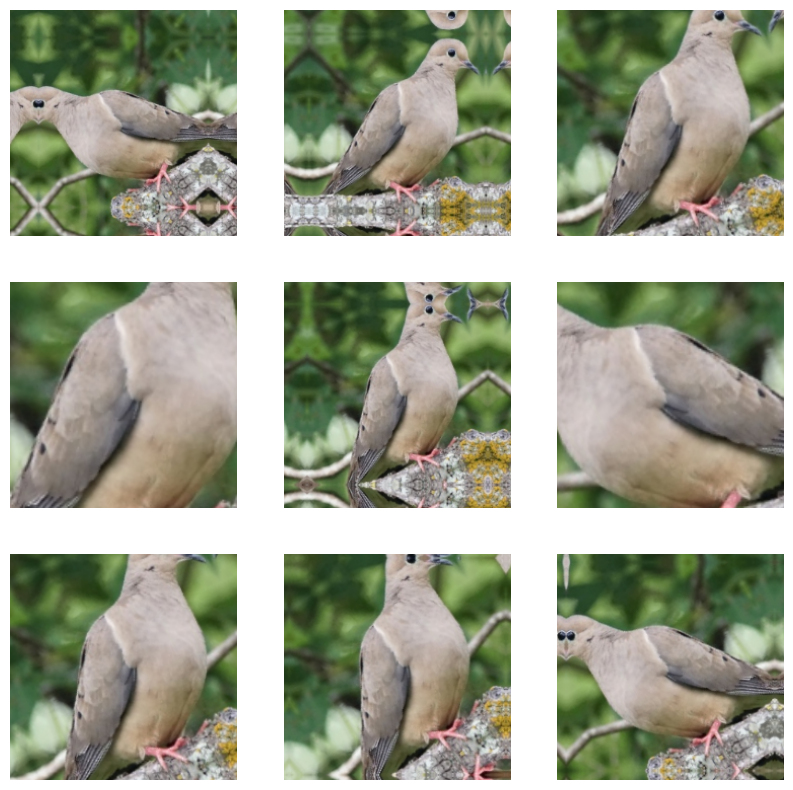

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
img_size = (224, 224)

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 111, 111, 32)      128   

In [ ]:
import tensorflow as tf
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525.keras",
        save_best_only=True,
        monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validata,
    callbacks=callbacks)

Epoch 1/20
2645/2645 [==============================] - 197s 71ms/step - loss: 5.1756 - accuracy: 0.0607 - val_loss: 3.6014 - val_accuracy: 0.2541
Epoch 2/20
2645/2645 [==============================] - 189s 71ms/step - loss: 3.4189 - accuracy: 0.2704 - val_loss: 2.0444 - val_accuracy: 0.5509
Epoch 3/20
2645/2645 [==============================] - 189s 71ms/step - loss: 2.4766 - accuracy: 0.4444 - val_loss: 1.5005 - val_accuracy: 0.6564
Epoch 4/20
2645/2645 [==============================] - 189s 71ms/step - loss: 1.9930 - accuracy: 0.5438 - val_loss: 1.1283 - val_accuracy: 0.7528
Epoch 5/20
2645/2645 [==============================] - 188s 71ms/step - loss: 1.6739 - accuracy: 0.6096 - val_loss: 0.9178 - val_accuracy: 0.7859
Epoch 6/20
2645/2645 [==============================] - 188s 71ms/step - loss: 1.4632 - accuracy: 0.6520 - val_loss: 0.7970 - val_accuracy: 0.8171
Epoch 7/20
2645/2645 [==============================] - 188s 71ms/step - loss: 1.3137 - accuracy: 0.6850 - val_loss: 0

In [ ]:
test_model = keras.models.load_model(
    "bird525.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

83/83 [==============================] - 2s 22ms/step - loss: 0.3116 - accuracy: 0.9189
Test accuracy: 0.919


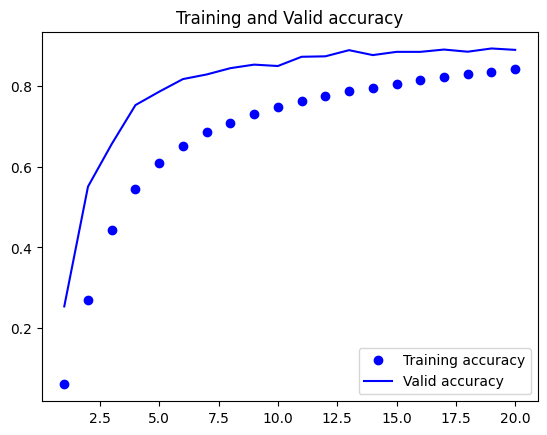

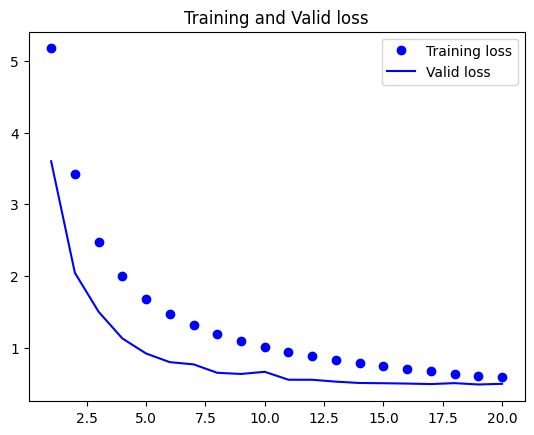

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_dataset)
pred

83/83 [==============================] - 2s 25ms/step


array([[3.6454690e-20, 1.5131671e-20, 1.9666736e-12, ..., 7.6471317e-18,
        2.0502649e-13, 3.4740431e-23],
       [1.0668970e-11, 2.9590866e-04, 2.0804027e-14, ..., 3.0375635e-14,
        2.2243646e-14, 1.5916928e-07],
       [3.6119667e-13, 1.1412494e-14, 7.5391313e-14, ..., 3.2502348e-15,
        2.0837511e-12, 3.5002788e-12],
       ...,
       [1.3750904e-12, 7.5707923e-08, 1.0007810e-07, ..., 2.6283217e-18,
        1.0766366e-10, 6.7050366e-15],
       [1.6761856e-17, 8.1940834e-16, 1.4964498e-15, ..., 3.8844647e-19,
        1.2589222e-14, 1.2161862e-17],
       [8.3343717e-16, 5.5545086e-05, 2.0191671e-11, ..., 1.2434331e-09,
        2.7557306e-10, 2.5070864e-15]], dtype=float32)

In [ ]:
np.argmax(pred[0])

64

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
def results(filename, class_names):
    img = load_img(filename,target_size=(224,224))
    imgconv = img_to_array(img)
    img_array = np.expand_dims(imgconv,axis=0)
    pred = np.argmax(model.predict(img_array))
    predimg = class_names[pred]
    predver = np.max(model.predict(img_array))
    pred
    plt.imshow(img)
    plt.title("Eto: {}, veroyatnost : {}".format (predimg, predver))

1/1 [==============================] - 0s 17ms/step


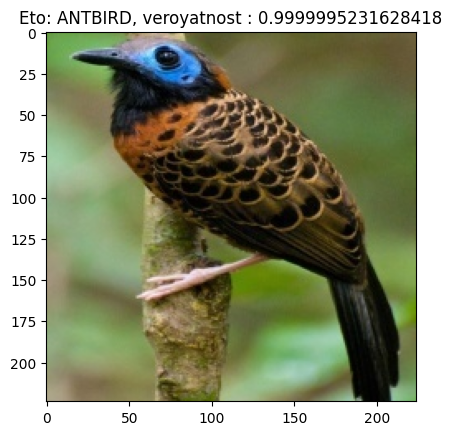

In [ ]:
results('/kaggle/input/100-bird-species/test/ANTBIRD/1.jpg', class_names)

1/1 [==============================] - 0s 17ms/step


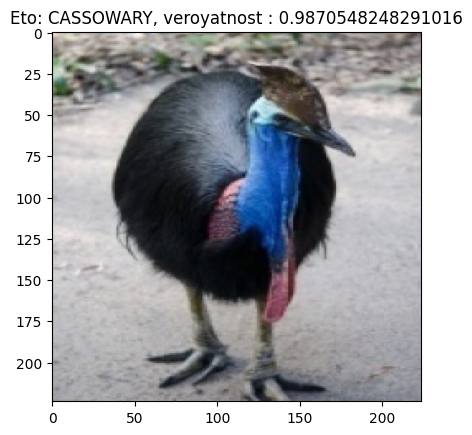

In [ ]:
results('/kaggle/input/100-bird-species/test/CASSOWARY/3.jpg', class_names)

1/1 [==============================] - 0s 39ms/step


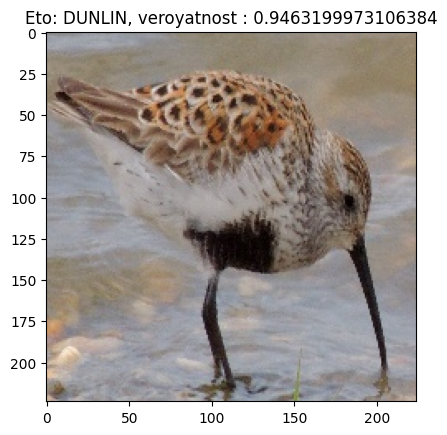

In [ ]:
results('/kaggle/input/100-bird-species/test/DUNLIN/4.jpg', class_names)